# Libraries

In [7]:
import numpy as np
from scipy.stats import *
from sympy import *
from scipy.special import *
import math
import matplotlib.pyplot as plt
from itertools import *
from tqdm.notebook import tqdm

from matplotlib import style
plt.style.use('ggplot')

# 1
Из первых 10 натуральных чисел случайным образом выбираются 4 числа.  
Какова вероятность того, что по крайней мере два числа совпадут?

## Аналитика
$\Omega = \{ (a, b, c, d, e): 1 \leqslant a, b, c, d, e \leqslant 10 \}; \mu(\Omega) = 10^4 = 10000$  
$A = \{ (a, b, c, d, e): (a, b, c, d, e) := o \in \Omega; \left\langle a,b,c,d,e\right\rangle \} \leqslant 3; \mu(A) = 10000 - 10 \cdot 9 \cdot 8 \cdot 7 - 10^2 \cdot 1 \cdot 1 = 4960$  
$\mathbb P(A) = \frac{\mu(A)}{\mu(\Omega)} = \frac{4960}{10000} = 0,496$

## Стохастический эксперимент

In [18]:
Omega = list(product(range(1, 11), repeat=4))
Omega_ = np.array(Omega)
Omega

[(1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 1, 3),
 (1, 1, 1, 4),
 (1, 1, 1, 5),
 (1, 1, 1, 6),
 (1, 1, 1, 7),
 (1, 1, 1, 8),
 (1, 1, 1, 9),
 (1, 1, 1, 10),
 (1, 1, 2, 1),
 (1, 1, 2, 2),
 (1, 1, 2, 3),
 (1, 1, 2, 4),
 (1, 1, 2, 5),
 (1, 1, 2, 6),
 (1, 1, 2, 7),
 (1, 1, 2, 8),
 (1, 1, 2, 9),
 (1, 1, 2, 10),
 (1, 1, 3, 1),
 (1, 1, 3, 2),
 (1, 1, 3, 3),
 (1, 1, 3, 4),
 (1, 1, 3, 5),
 (1, 1, 3, 6),
 (1, 1, 3, 7),
 (1, 1, 3, 8),
 (1, 1, 3, 9),
 (1, 1, 3, 10),
 (1, 1, 4, 1),
 (1, 1, 4, 2),
 (1, 1, 4, 3),
 (1, 1, 4, 4),
 (1, 1, 4, 5),
 (1, 1, 4, 6),
 (1, 1, 4, 7),
 (1, 1, 4, 8),
 (1, 1, 4, 9),
 (1, 1, 4, 10),
 (1, 1, 5, 1),
 (1, 1, 5, 2),
 (1, 1, 5, 3),
 (1, 1, 5, 4),
 (1, 1, 5, 5),
 (1, 1, 5, 6),
 (1, 1, 5, 7),
 (1, 1, 5, 8),
 (1, 1, 5, 9),
 (1, 1, 5, 10),
 (1, 1, 6, 1),
 (1, 1, 6, 2),
 (1, 1, 6, 3),
 (1, 1, 6, 4),
 (1, 1, 6, 5),
 (1, 1, 6, 6),
 (1, 1, 6, 7),
 (1, 1, 6, 8),
 (1, 1, 6, 9),
 (1, 1, 6, 10),
 (1, 1, 7, 1),
 (1, 1, 7, 2),
 (1, 1, 7, 3),
 (1, 1, 7, 4),
 (1, 1, 7, 5),
 (1, 1, 7, 6),
 (1,

In [19]:
def get_p(good_events, events):
    return len(good_events) / len(events)

good_events = [event for event in Omega if len(set(event)) <= 3]
get_p(good_events, Omega)

0.496

## Статистическая вероятность

In [8]:
n_exp = 10_000

In [22]:
def plot_var(x, y, normal_var):
    plt.figure(figsize=(15, 5), dpi=300)
    plt.plot(x, y, label='Относительная Вероятность')
    plt.plot(x, [normal_var] * len(y), label='Вероятность')
    plt.xlabel('Число проведенных реализаций опыта (N)')
    plt.ylabel('Относительная частота $\\hat{p}(A)$')
    plt.title('Статистическая устойчивость')
    plt.legend()
    plt.grid(True)
    plt.show()

In [29]:
x = np.arange(1, n_exp+1)
y = []
for n in tqdm(range(1, n_exp+1)):
    omega = Omega_[np.random.choice(Omega_.shape[0], n, replace=False), :]
    good_events = [event for event in omega if len(set(event)) <= 3]

    y.append(get_p(good_events, omega))

  0%|          | 0/10000 [00:00<?, ?it/s]

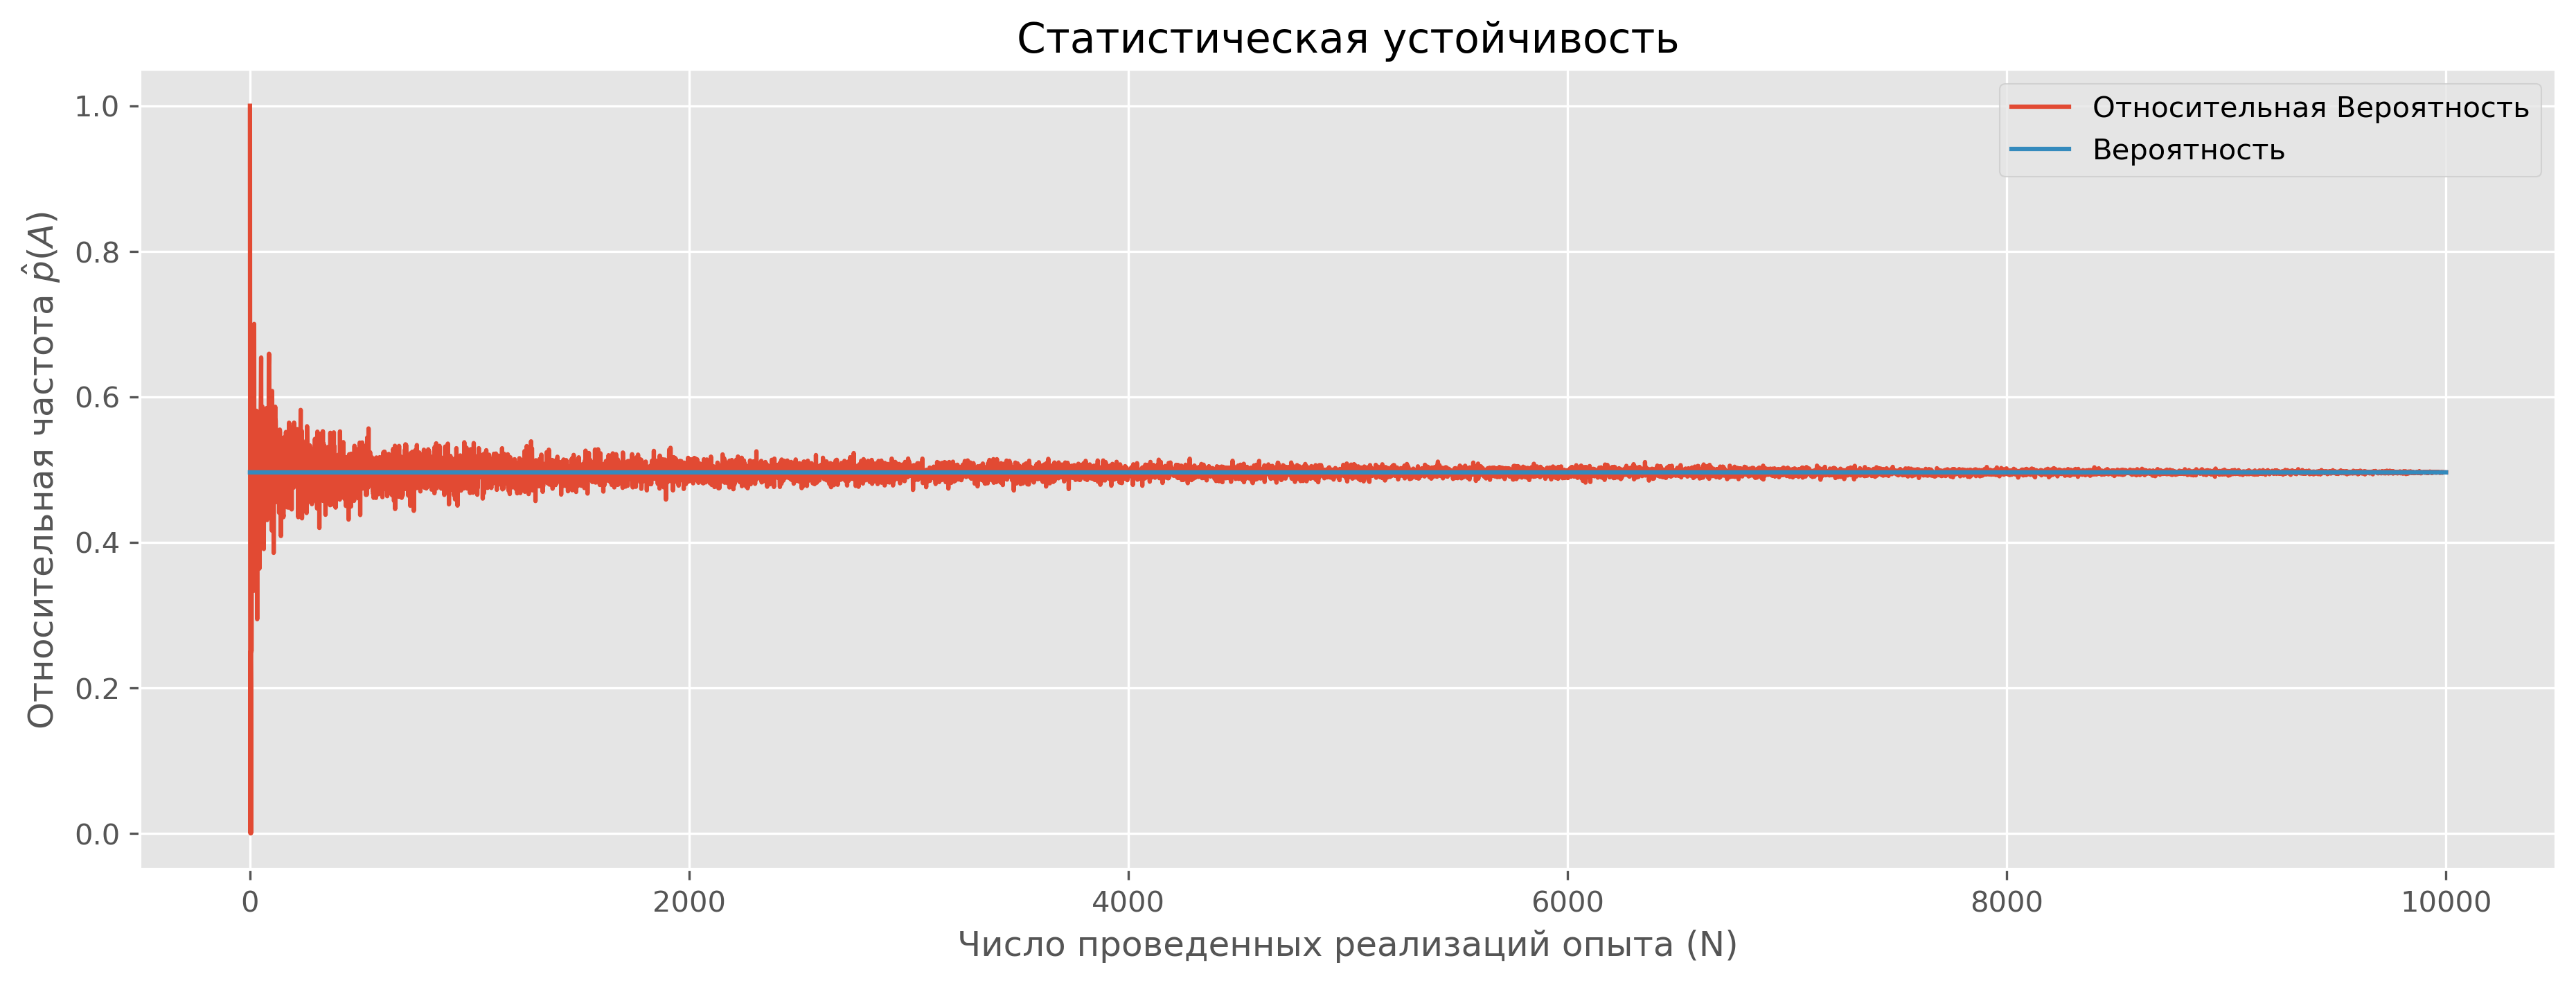

In [30]:
plot_var(x, y, 0.496)

# 2
В круг радиуса 90 наудачу бросаются 4 точки. Найдите вероятность того, что расстояние от центра круга до ближайшей точки будет не больше 45.

## Аналитика
$C = \{(x, y): x^2 + y^2 \leqslant 90^2\}$  
$\Omega = \{ (a, b, c, d, e): \forall(a, b, c, d, e) \in C; \mu(\Omega) = (\pi \cdot 90^2)^4\}$  
$A = \{point: \sqrt{a_x^2 + a_y^2} \leqslant 45 \ldots \}$    
$\mathbb P(A) = \mathbb P(A_1) \cdot \mathbb P(A_2) \cdot \mathbb P(A_3) \cdot \mathbb P(A_4) = \mathbb P(A_i)^4$   
$\mathbb P(\bar{A_i}) = \frac{S_1}{S_2} = \frac{\pi \cdot (R^2 - r^2)}{\pi \cdot R^2} = \frac{90^2 - 45^2}{90^2} = \frac{3}{4}$   
$\mathbb P(A) = 1 - \mathbb P(A_i)^4 = 1 - \frac{3}{4}^4 \approx 0,684$

## Стохастический эксперимент

## Статистическая вероятность

In [26]:
R=uniform(0,1)
Phi=uniform(0,2)
n_exp=10_000

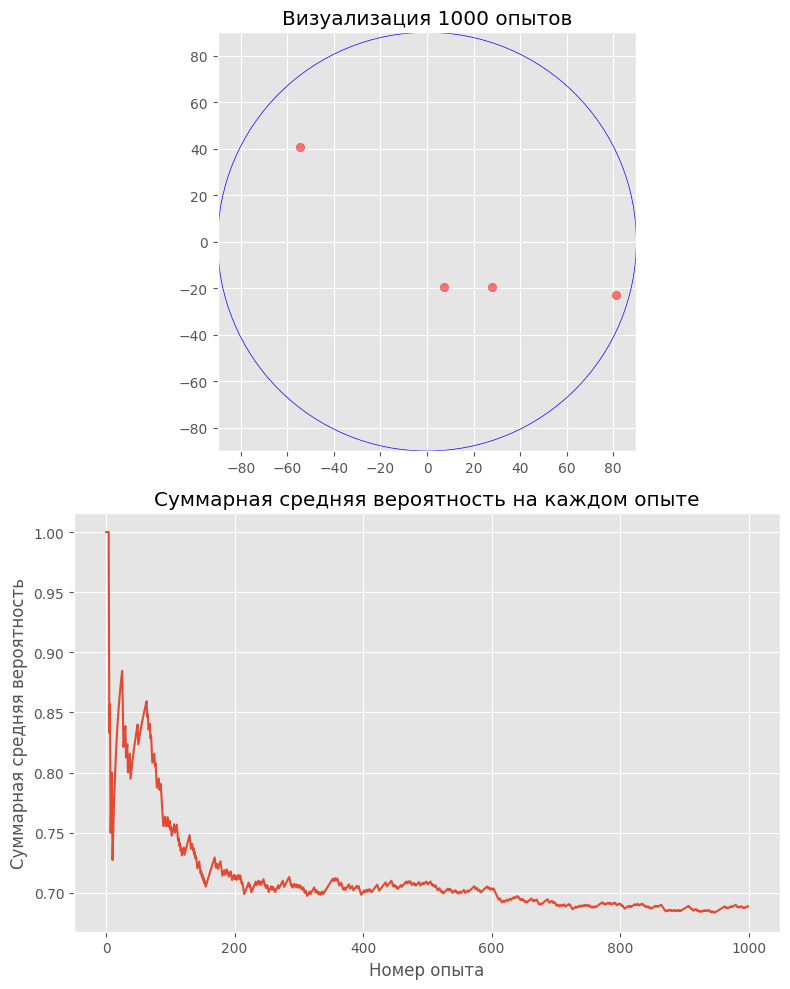

In [29]:
num_points = 4
radius = 90
num_experiments = 1000
probabilities = []
cumulative_avg_probabilities = []

for i in range(num_experiments):
    theta = 2 * np.pi * np.random.rand(num_points)
    r = radius * np.sqrt(np.random.rand(num_points))

    x = np.sqrt(r) * np.cos(theta)
    y = np.sqrt(r) * np.sin(theta)

    distances = np.sqrt(x**2 + y**2)


    probability = distances.min() <= 45
    probabilities.append(probability)
    cumulative_avg_prob = np.mean(probabilities)
    cumulative_avg_probabilities.append(cumulative_avg_prob)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

circle = plt.Circle((0, 0), radius, color='blue', fill=False)
ax1.add_artist(circle)
ax1.scatter(x, y, color='red', alpha=0.5)
ax1.set_aspect('equal', 'box')
ax1.set_xlim(-radius, radius)
ax1.set_ylim(-radius, radius)
ax1.set_title(f"Визуализация {n_exp} опытов")

ax2.plot(cumulative_avg_probabilities)
ax2.set_xlabel("Номер опыта")
ax2.set_ylabel("Суммарная средняя вероятность")
ax2.set_title("Суммарная средняя вероятность на каждом опыте")

plt.tight_layout()
plt.show()


In [14]:
np.random.choice(x1, 1)

array([-78.14154136])

# 3
События $A, B$ и $C$ независимы, $P(A) = 0,3; P(B) = 0,6$ и $P(C) = 0,9$.  
1) Найдите вероятность события $D = (A + B)(A + C)(B + C)$.  
2) Найдите вероятность события $D$, если известно, что событие $A$ уже наступило.

## Аналитика

1. $(A + B)(A + C)(B + C) = (0.3 + 0.6 - 0.18) \cdot (0.3 + 0.9 - 0.27) \cdot (0.6 + 0.9 - 0.54) = 0.642816$
2. $1 \cdot 1 \cdot (B + C) = (0.6 + 0.9 - 0.54) = 0.96$



# 4
Имеется $36$ монет, из которых $7$ бракованные: вследствие заводского брака на этих монетах с обеих сторон отчеканен герб. Наугад выбранную монету, не разглядывая, бросают несколько раз.   
1) Какова вероятность, что при $4$ бросках она ляжет гербом вверх?   
2) При $4$ бросках монета легла гербом вверх. Какова вероятность того, что была выбрана монета с двумя гербами?  

## Аналитика
1. Шанс, с которым мы вытягиваем монету с двумя гербами и точно выбиваем 4 герба - $\frac{7}{36}$  
Шанс, с которым мы вытягиваем любую другую монету - $\frac{29}{36}$  
Шанс, с которым у нас всегда выпадает герб для любой монеты (не бракованной) - $\frac{1}{16}$   
Шанс, с которым мы либо вытягиваем брак, либо обычную монету и у нас всегда выпадает герб - $\frac{7}{36} + \frac{29}{36} \cdot \frac{1}{16} = 0.2447917$    
$\mathbb P(A) = \mathbb P(H_1) \cdot \mathbb P(A|H_1) + \mathbb P(H_2) \cdot \mathbb P(A|H_1)$ 

2. Шанс, с которым мы выбираем монету, которую подкидываем несколько раз и нам выпадает только герб $= 0.2447917$  
Этот шанс мы возьмём за $100%$, тогда шанс, что мы вытянули монету с гербом из этого всего = $\frac{7}{36}$  
Шанс, что была выбрана монета с двумя гербами$ = \frac{\frac{7}{36}}{0.2447917} = 0.794326$

## Стохастический эксперимент

In [41]:
Omega = list(permutations(['1'] * 7 + ['0.0625'] * 29, r=1))
Omega

[('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',),
 ('0.0625',)]

### 1

In [43]:
events_good = [float(event[0]) * (1/36) for event in Omega]
sum(events_good)

0.24479166666666652

### 2

In [44]:
def p(event, good):
    return good/sum(event)
events_good = [float(event[0]) * (1/36) for event in Omega]
p(events_good, Omega.count(('1',))*(1/36))

0.7943262411347521

# 5
Банк совершил $n = 177000$ транзакций по кредитным картам. Вероятность того, что транзакция будет ошибочной, равна $0,00046$. Используя приближенную формулу для числа успехов в схеме Бернулли, найдите вероятность того, что среди этих $n$ транзакций имеется не более $103$ ошибочных. В решении необходимо проверить условие применимости приближенной формулы.

## Аналитика
$p = 0,00046; q = 1 - p = 0,99954$  
$\mathbb P(A) = \Sigma_{k=0}^{103}C_n^k \cdot p^k \cdot q^{n-k} \approx 0,9918$  

$ N = 177.000 $    
$ P = 0.0046$    
$Q = 1 - P$     
$m1, m2 = 0, 103$  
Найдем вероятность того, что от 0 до 103 транзакций будут ошибочными     
Воспользуемся интегральной теоремой Муавра-Лапласа, найдем $x_1$ $x_2$   
$ x_i = \frac{m_1 - np}{\sqrt{npq}}$       
$x_1 = -9.025 \approx -9 $    
$x_2 =  2.392 \approx 2.4$    
Воспользуемся нечетностью функции Лапласа и найдем функцию от $x_1$   $x_2$ по таблице    

$P(m_1 \leq m \leq m_2) = \Phi(x_2) - \Phi(x_1)$

$\Phi(x_1) = -\Phi(9)  = -0.5$    
$\Phi(x_2) = \Phi(2.392) = 0.4918$    

$P(0 \leq m \leq 103) = 0.4918 - (-0.5) = 0.9918$

Тогда искомая вероятность:    
$P(A) = 0.9918 $

In [36]:
s = 0
from decimal import Decimal
for k in tqdm(range(0, 103+1)):
    s += math.comb(177_000, k) * ((0.00046) ** k) * ((0.99954) ** (177_000 - k))
s

  0%|          | 0/81 [00:00<?, ?it/s]

0.46666559173292455

In [ ]:
n = 177_000
p = 0.00046
q = 1 - p
m2 = 103
m1 = 0

x1 = (m1 - n*p) / ((n*p*q) ** 0.5)

x2 = (m2 - n*p) / ((n*p*q) ** 0.5)
0.9918

# 6
Шесть пассажиров садятся на остановке в поезд, состоящий из четырех
вагонов. Каждый из пассажиров может сесть с одинаковой вероятностью
в любой вагон. Найдите вероятность, что пассажиры сядут в один вагон
при условии, что хотя бы в один вагон не сядет ни один пассажир.

## Аналитика

In [11]:
(6 * 'P' + 3 * '|').split('|')

['PPPPPP', '', '', '']

## Стохастический эксперимент

In [13]:
Omega_ = list(''.join(x) for x in permutations(6 * 'P' + 3 * '|'))

In [3]:
Omega = [x for x in Omega_ if any(vagon == '' for vagon in x.split('|'))]
Omega

[('1', '1', '1', '1', '1', '1'),
 ('1', '1', '1', '1', '1', '2'),
 ('1', '1', '1', '1', '1', '3'),
 ('1', '1', '1', '1', '1', '4'),
 ('1', '1', '1', '1', '2', '1'),
 ('1', '1', '1', '1', '2', '2'),
 ('1', '1', '1', '1', '2', '3'),
 ('1', '1', '1', '1', '2', '4'),
 ('1', '1', '1', '1', '3', '1'),
 ('1', '1', '1', '1', '3', '2'),
 ('1', '1', '1', '1', '3', '3'),
 ('1', '1', '1', '1', '3', '4'),
 ('1', '1', '1', '1', '4', '1'),
 ('1', '1', '1', '1', '4', '2'),
 ('1', '1', '1', '1', '4', '3'),
 ('1', '1', '1', '1', '4', '4'),
 ('1', '1', '1', '2', '1', '1'),
 ('1', '1', '1', '2', '1', '2'),
 ('1', '1', '1', '2', '1', '3'),
 ('1', '1', '1', '2', '1', '4'),
 ('1', '1', '1', '2', '2', '1'),
 ('1', '1', '1', '2', '2', '2'),
 ('1', '1', '1', '2', '2', '3'),
 ('1', '1', '1', '2', '2', '4'),
 ('1', '1', '1', '2', '3', '1'),
 ('1', '1', '1', '2', '3', '2'),
 ('1', '1', '1', '2', '3', '3'),
 ('1', '1', '1', '2', '3', '4'),
 ('1', '1', '1', '2', '4', '1'),
 ('1', '1', '1', '2', '4', '2'),
 ('1', '1'

In [16]:
A = [x for x in Omega if 6 * 'P' in x]
len(A) / len(Omega)

0.05405405405405406

# 7
Написаны $n$ писем, но адреса на конвертах написаны наудачу. Какова вероятность того, что:  
a) по крайней мере один из адресатов получит предназначенное ему письмо?   
б) m адресатов получат соответствующие письма?   
Решить задачу для $n = 8$ и $m = 3$, а затем и в общем случае. Также найдите соответствующую статистическую вероятность и постройте график зависимости относительной частоты от числа экспериментов $N$.

## Общий случай
$|\Omega| = P_n^n = n! $  
Пусть $A_i, i=1,n$ - вероятность того, что $i$ - попадет владельцу  
Поэтому $A$ - зависимое событие
Воспользуемся формулой: $\mathbb P(A_1 \cup \ldots \cup A_n) = \Sigma_{i=1}^n \mathbb P(A_i) - \Sigma_{i<j} \mathbb P(A_i A_j) + \ldots (-1)^{n-1} \cdot \mathbb P(A_1 A_2 \ldots A_n).$  то
$$\mathbb P(A_i) = 1$$
$$\mathbb P(A_i A_j) = \frac{P_{n}^{n-2}}{n!} = \frac{1}{n(n-1)}$$
$$\ldots$$
$$\mathbb P(A) = 1 - C_n^2 \cdot \frac{1}{n(n-1)} + \ldots + (-1)^{n-1} \cdot \frac{1}{n!} = 1 - \frac{1}{2!} + \frac{1}{3!} - \ldots + (-1)^{n-1} \cdot \frac{1}{n!}$$

In [ ]:
s = 0
for i in range(1, 9):
    s += (-1) ** (i - 1) * 1 / math.factorial(i)
s

In [ ]:
Omega = list("".join(map(str, i)) for i in permutations(range(1, 9)))
Omega

In [ ]:
A = [x for x in Omega if any(int(i) == idx for idx, i in enumerate(x, start=1))]
A

# 9

Случайная точка $(x, y)$ имеет равномерное распределение в квадрате $|\Omega| = \{(x, y): 0 \leqslant x \leqslant 1; 0 \leqslant y \leqslant 1 \}$. При каких положительных значениях $r$ независимы
события $A_r = \{ |x − y| > r\} $ и $B_r = \{x + y \leqslant 3r\}$?

## Аналитика

$\mu(\Omega) = 1$  
$\mu(A) = (1 - r)^2$  
$\mathbb P(A) = \frac{\mu(A)}{\mu(\Omega)} = \frac{(1-r)^2}{1} = (1-r)^2$   
$\mu(B) = \frac{1}{2} \cdot 9r^2$  
$\mathbb P(B) = \frac{\mu(B)}{\mu(\Omega)} = \frac{\frac{1}{2}9r^2}{1} = \frac{9}{2}r^2$   
$A \cap B = \{ (x, y): (x, y) \in \Omega: |x - y| > r; x + y \leqslant 3r \}$  
$\mu(A \cap B) = 2 \cdot \frac{1}{4} \cdot (2r)^2 = 2 r^2$  
$\mathbb P(A \cap B) = \frac{\mu(A \cap B)}{\mu(\Omega)} = 2 r^2$  
Проверяем на независимость:
$\mathbb P(A \cap B) = \mathbb P(A) \cdot \mathbb P(B)$:   
$2 r^2 = (1 - r)^2 \cdot \frac{9}{2} r^2; \\ r_1 = 0, r_2 = \frac{1}{3}, r_3 = \frac{5}{3}$

## Общий случай
$|\Omega| = P_n^n = n! $  
Пусть $A_i, i=1,n$ - вероятность того, что $i$ - попадет владельцу  
Поэтому $A$ - зависимое событие
Воспользуемся формулой: $\mathbb P(A_1 \cup \ldots \cup A_n) = \Sigma_{i=1}^n \mathbb P(A_i) - \Sigma_{i<j} \mathbb P(A_i A_j) + \ldots (-1)^{n-1} \cdot \mathbb P(A_1 A_2 \ldots A_n).$  то
$$\mathbb P(A_i) = 1$$
$$\mathbb P(A_i A_j) = \frac{P_{n}^{n-2}}{n!} = \frac{1}{n(n-1)}$$
$$\ldots$$
$$\mathbb P(A) = 1 - C_n^2 \cdot \frac{1}{n(n-1)} + \ldots + (-1)^{n-1} \cdot \frac{1}{n!} = 1 - \frac{1}{2!} + \frac{1}{3!} - \ldots + (-1)^{n-1} \cdot \frac{1}{n!}$$

# 10

In [5]:
import math
math.comb(11, 1) * (1/3) * (2/3) ** 10

0.06358560969138621